# Quantifying semisc similarity
## Chapter X: 032-Patch-retrieval-TSNE

### Author: Anders Kampenes

### 032-Patch-retrieval-TSNE

In [ ]:
### Loading and preparing dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.data_utils.plots import scatter, visualize_scatter_with_images,plot_similar_image, plot_similar_image,  plot_random_directions, plot_subset_of_directions  
from scripts.data_utils.generators import SimilarityImageGenerator, generate_directional_dataset, flatten_directional_data
from scripts.data_utils.grid_utils import pad_data_to_fit_patch, blockshaped, unblockshaped, plot_embeddings, create_patched_data, plot_patched_directions

chapterName = "032-Patch-retrieval-UMAP"
prevChapterName = "02-data_sequence_analysis_patch"
input_folder = "/Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/notebooks/" + prevChapterName
output_folder = "/Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/notebooks/" + chapterName
data_cube = np.load("/Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8.npy")

print("img shape", data_cube.shape)

directions, inline_samples, xline_samples, tline_samples,data, labels, num_samples, shape = generate_directional_dataset(data_cube)
#print("labels", labels["inline"], labels["xline"], labels["tline"])
print(shape)


/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

img shape (651, 951, 462)
651 951 462
{'inline': [951, 462], 'xline': [651, 462], 'tline': [651, 951]}


17


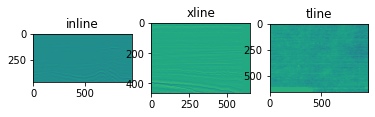

In [2]:


# plt different slices 
plot_random_directions(data, 100)


   

In [3]:
# we have now padded all directions and can extract patched of patch_size 
#
patch_size = 64

padded_data = pad_data_to_fit_patch(data, patch_size, directions, num_samples, input_folder)
for dir in directions:
    print("padded_data", padded_data[dir].shape)
    
patched_data, patched_labels, patched_labels_per_image, patched_labels_per_grid_cell, patched_labels_per_grid_cell, patched_grid_sizes, patched_num_smaples =  create_patched_data(padded_data, patch_size, directions)





padding_needed {'inline': 53, 'xline': 9, 'tline': 50}
Found inline
Found xline
Found tline
padded_data (704, 960, 512)
padded_data (960, 704, 512)
padded_data (512, 960, 704)
dir shape (704, 960, 512)
nm 15 8 84480
patched_data (84480, 64, 64)
patched_labels[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [84470. 84471. 84472. 84473. 84474. 84475. 84476. 84477. 84478. 84479.]
patched_labels_per_image[dir] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [703. 703. 703. 703. 703. 703. 703. 703. 703. 703.]
patched_labels_per_grid_cell[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [110. 111. 112. 113. 114. 115. 116. 117. 118. 119.]
dir shape (960, 704, 512)
nm 11 8 84480
patched_data (84480, 64, 64)
patched_labels[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [84470. 84471. 84472. 84473. 84474. 84475. 84476. 84477. 84478. 84479.]
patched_labels_per_image[dir] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [959. 959. 959. 959. 959. 959. 959. 959. 959. 959.]
patched_labels_per_grid_cell[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [78. 79. 80. 81. 82. 83. 8

random_slice 47160
patched_slice (120, 64, 64)


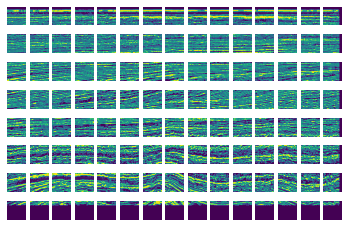

random_slice 73568
patched_slice (88, 64, 64)


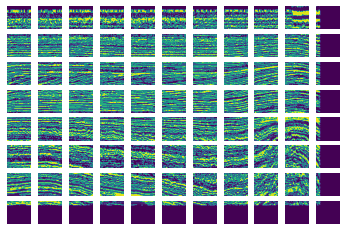

random_slice 16335
patched_slice (165, 64, 64)


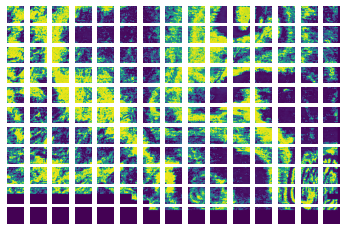

In [4]:
# plot random patches to verify

plot_patched_directions(padded_data, patched_data, patched_grid_sizes, patch_size, directions, output=False)    
        
    

In [ ]:
### Dimension reduction and visualization with PCA

In [6]:
from sklearn.cluster import KMeans
# flatten directions 
patched_data["inline"] = patched_data["inline"].reshape(patched_grid_sizes["inline"][0], -1)
patched_data["xline"] = patched_data["xline"].reshape(patched_grid_sizes["xline"][0], -1)
patched_data["tline"] = patched_data["tline"].reshape(patched_grid_sizes["tline"][0], -1)
print("flattten dirs", patched_data["inline"].shape, patched_data["xline"].shape, patched_data["tline"].shape )



flattten dirs (84480, 4096) (84480, 4096) (84480, 4096)


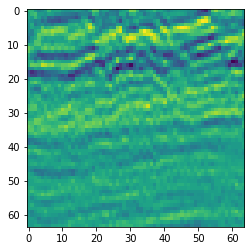

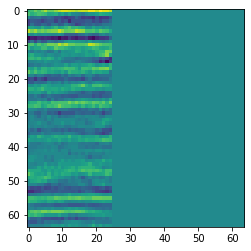

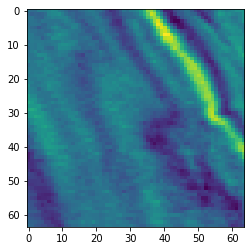

In [7]:

# verify one a single path on ech
for dir in directions:
    random = np.random.choice(patched_data[dir].shape[0], 1)[0]
    plt.imshow(patched_data[dir][random].reshape(patch_size,patch_size))
    plt.show()

In [9]:

import umap

UMAP ={}
for dir in directions:
    # TODO REMOVE just for veriication 
    patched_data[dir] = patched_data[dir][0:1000]
    patched_labels[dir] = patched_labels[dir][0:1000]
    patched_labels_per_image[dir] = patched_labels_per_image[dir][0:1000]
    patched_labels_per_grid_cell[dir] = patched_labels_per_grid_cell[dir][0:1000]

    print(patched_labels[dir].shape)
    reducer = umap.UMAP()
    filename = input_folder + "/UMAP_" + dir + ".npy"
    if not os.path.exists(filename):
        print("did not find data.. creating new...")
        UMAP[dir] = reducer.fit_transform(patched_data[dir])
        # store the data 
        np.save(filename, UMAP[dir])
    else:
        print("found data. loading it to memory")
        UMAP[dir] = np.load(filename)




(1000,)
found data. loading it to memory
(1000,)
found data. loading it to memory
(1000,)
found data. loading it to memory


num_labelsss 999 999.0
num_labelsss 999 999.0
num_labelsss 999 999.0


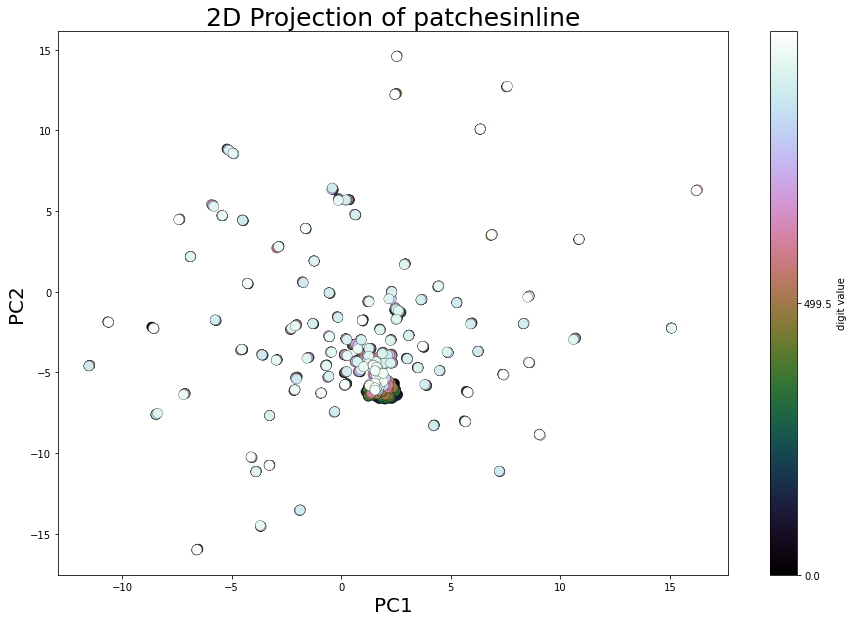

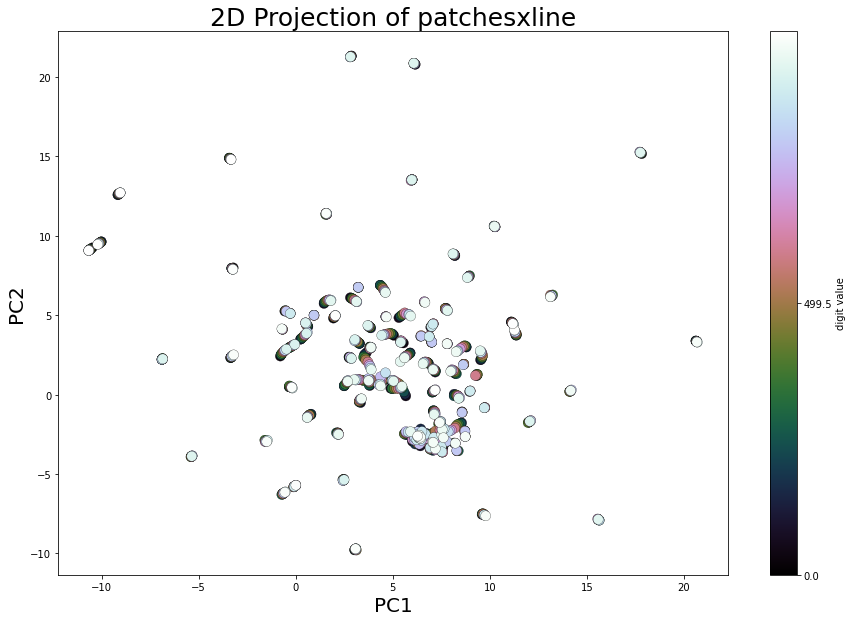

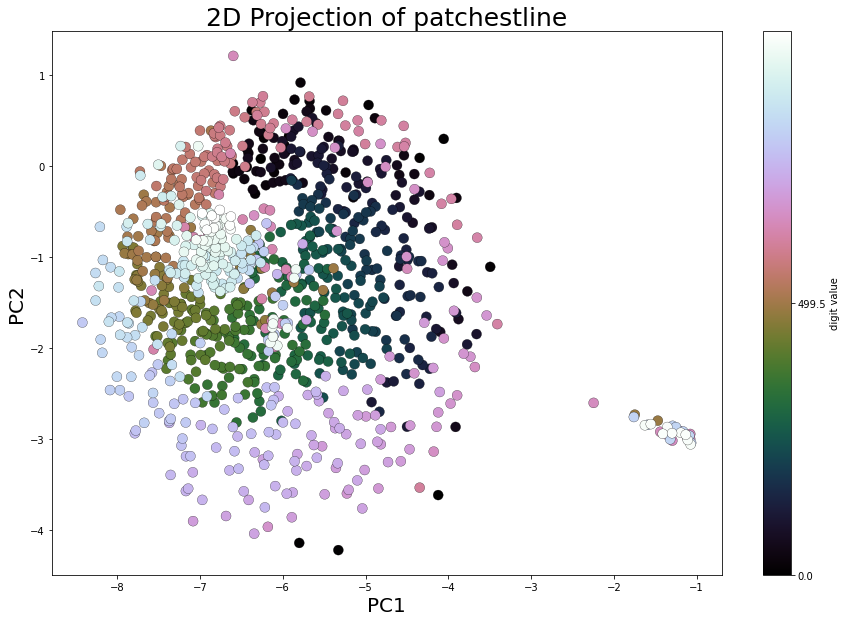

In [10]:

### plot pca of each direciton
for dir in directions:
    labelss =patched_labels[dir]
    num_labelss = int(np.max(labelss))
    print("num_labelsss", num_labelss, labelss[-1])
    scatter(UMAP[dir], labelss, num_labelss, dir, show_labels=False) 

UMAP[dir] (1000, 2)
UMAP[dir] (1000, 2)
UMAP[dir] (1000, 2)


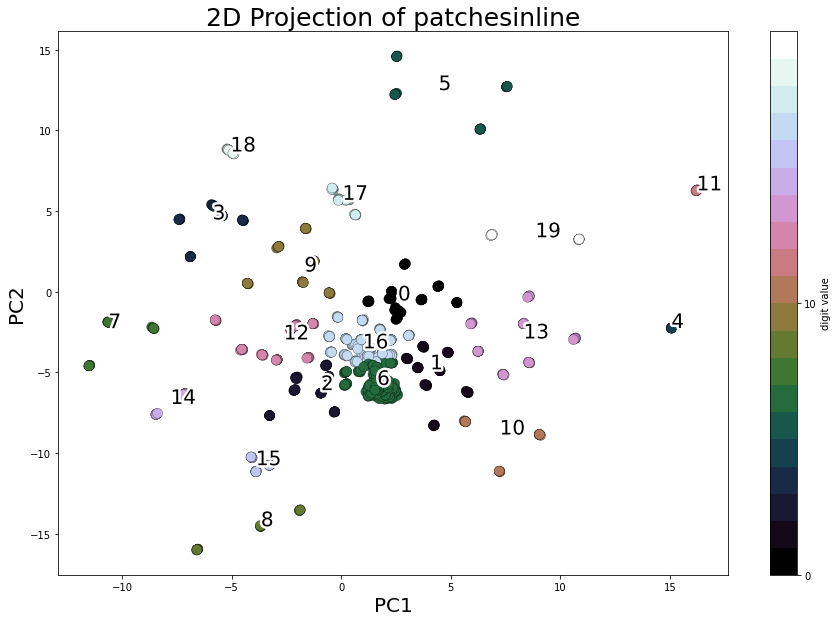

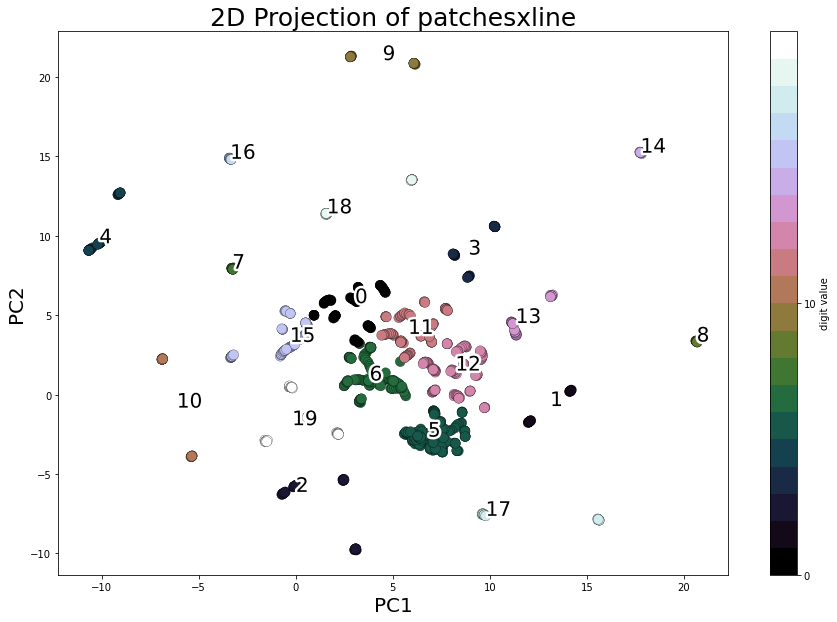

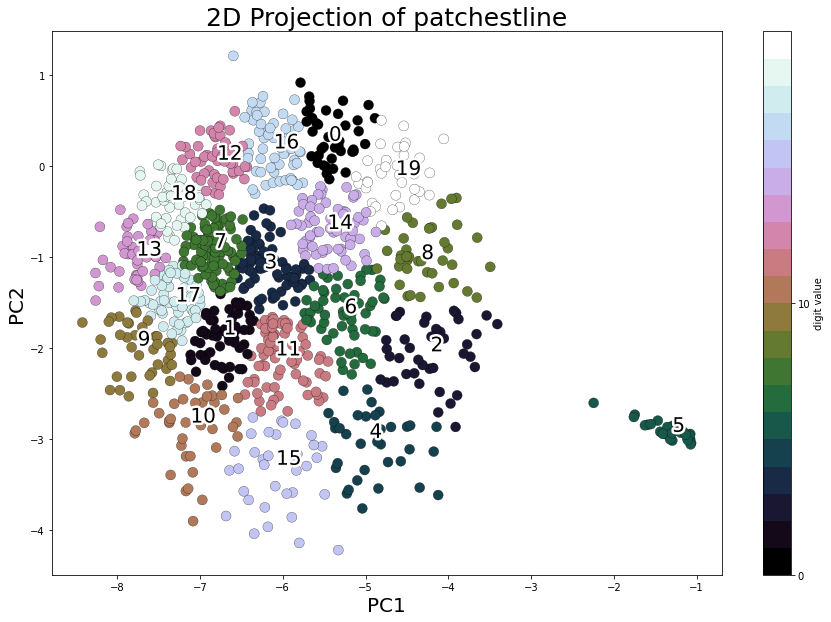

In [11]:
# perform k-means on each dir  to seperate into clusters?
from sklearn.cluster import KMeans

def perform_kmean(data,n_clusters):
    k_means = KMeans(n_clusters, random_state=0)
    k_means.fit(data)
    values = k_means.cluster_centers_.squeeze()
    labels_kmeans = k_means.labels_
    return k_means, values, labels_kmeans
n_clusters = 20

k_means= {}

for dir in directions:
    print("UMAP[dir]", UMAP[dir].shape)
    k_means[dir], values, labels_kmeans= perform_kmean(UMAP[dir],n_clusters)

    # plot 
    scatter(UMAP[dir], labels_kmeans, n_clusters, dir, output=output_folder +"/UMAP_kmeans_"+dir+"_"+str(n_clusters)+".png", show_labels=True)

REF [[2.440154790878296, -5.686351299285889, 6.0, 0.0]]
direction inline
treshold 50



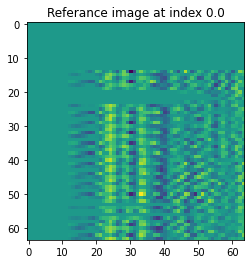

[159.0]

number left  999
most similar img [2.5555434226989746, 14.612597465515137, 5.0, 159.0]


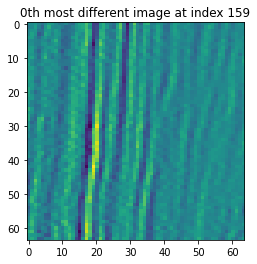

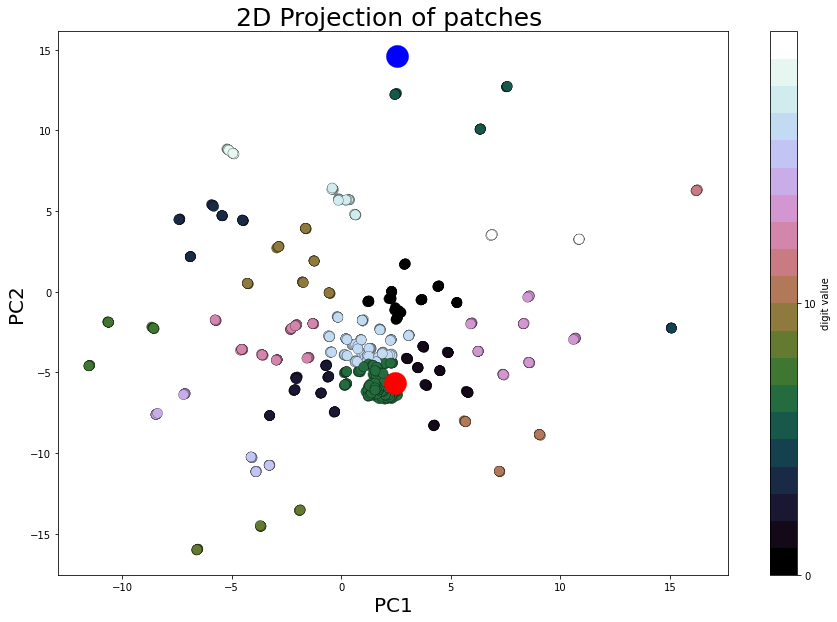

[515.0, 356.0]

number left  998
most similar img [-6.601065158843994, -16.012432098388672, 8.0, 515.0]


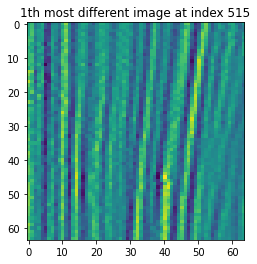

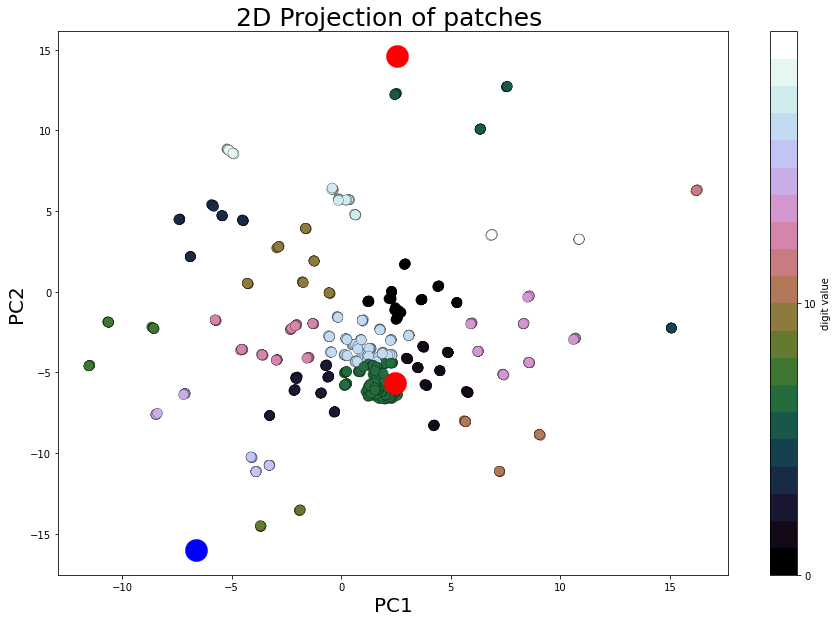

[636.0, 477.0, 121.0]

number left  997
most similar img [16.24879264831543, 6.31915283203125, 11.0, 636.0]


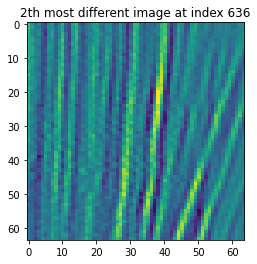

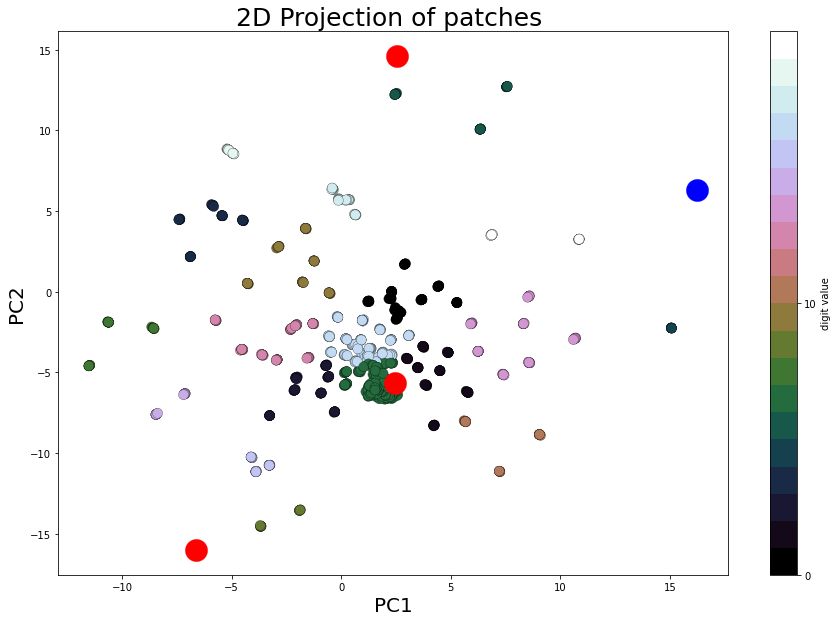

[405.0, 246.0, 110.0, 231.0]

number left  996
most similar img [-11.514382362365723, -4.604969024658203, 7.0, 405.0]


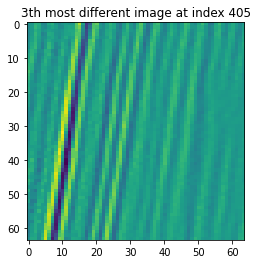

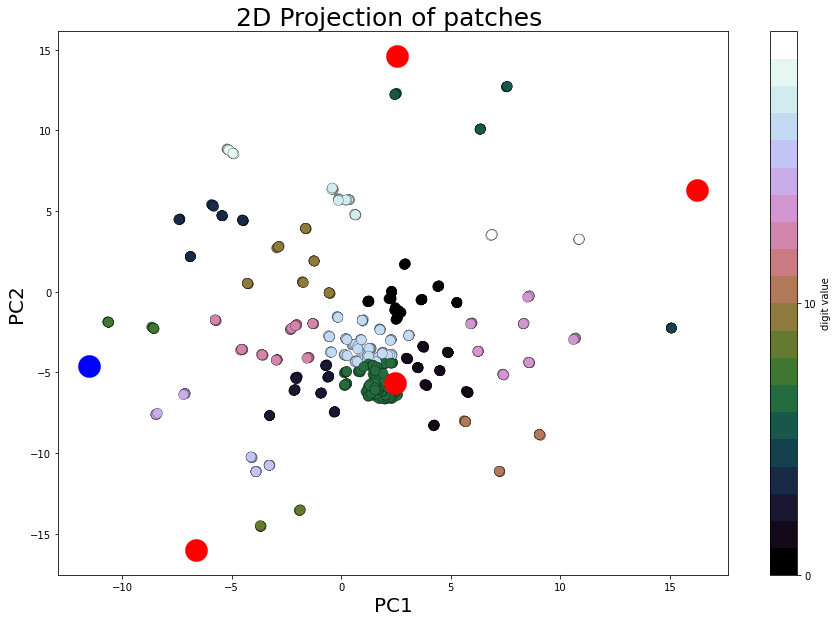

[516.0, 357.0, 1.0, 120.0, 111.0]

number left  993
most similar img [16.21329689025879, 6.2836503982543945, 11.0, 276.0]


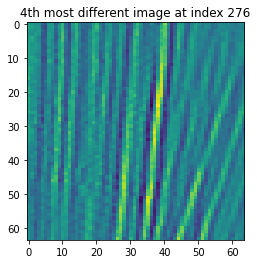

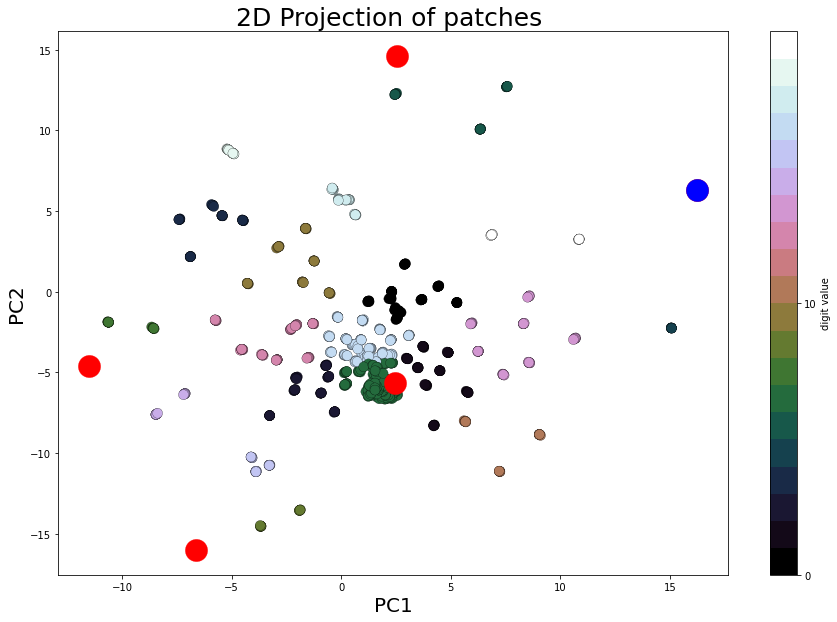

[995.0, 836.0, 480.0, 359.0, 590.0, 719.0]

number left  992
most similar img [-6.58149528503418, -15.992583274841309, 8.0, 995.0]


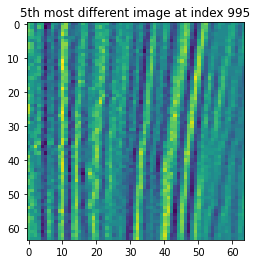

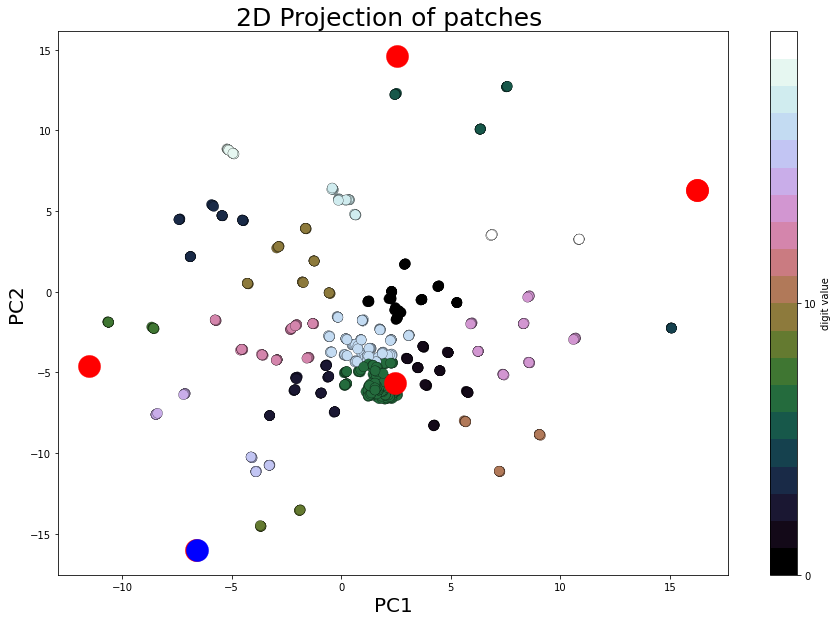

[39.0, 120.0, 476.0, 597.0, 366.0, 237.0, 956.0]

number left  989
most similar img [2.530905246734619, 14.58610725402832, 5.0, 759.0]


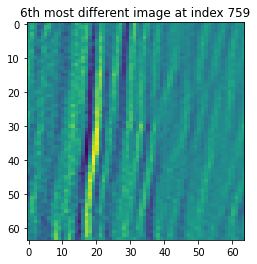

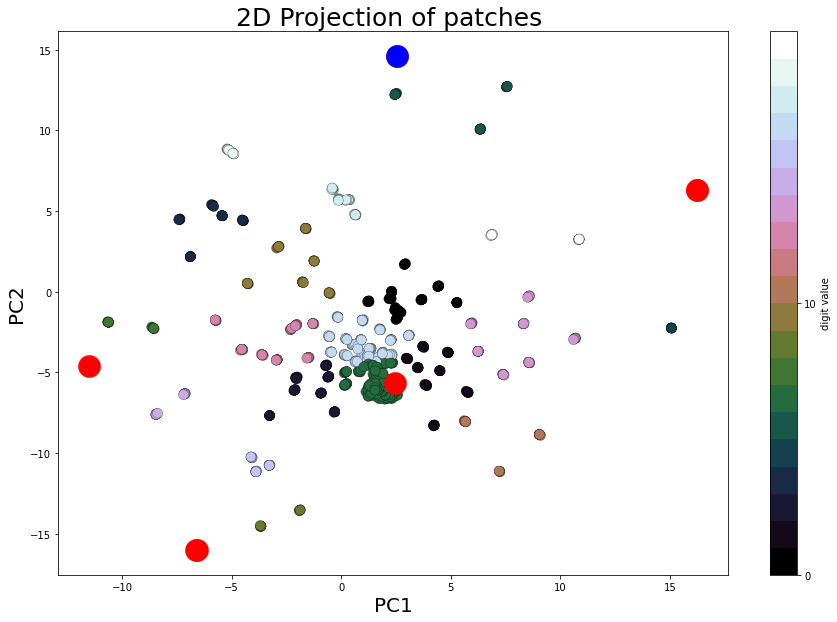

[635.0, 476.0, 120.0, 1.0, 230.0, 359.0, 360.0, 124.0]

number left  986
most similar img [-6.575167655944824, -15.986847877502441, 8.0, 875.0]


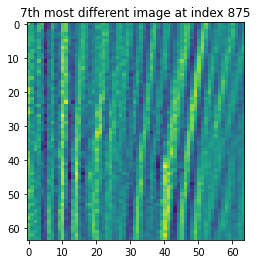

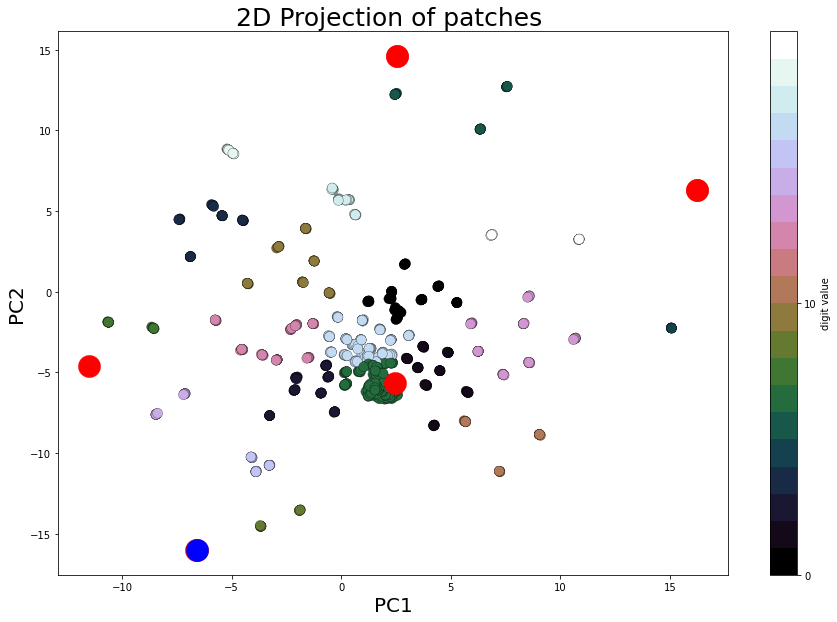

[943.0, 784.0, 428.0, 307.0, 538.0, 667.0, 52.0, 184.0, 68.0]

number left  985
most similar img [15.071521759033203, -2.2664222717285156, 4.0, 943.0]


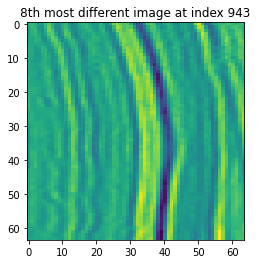

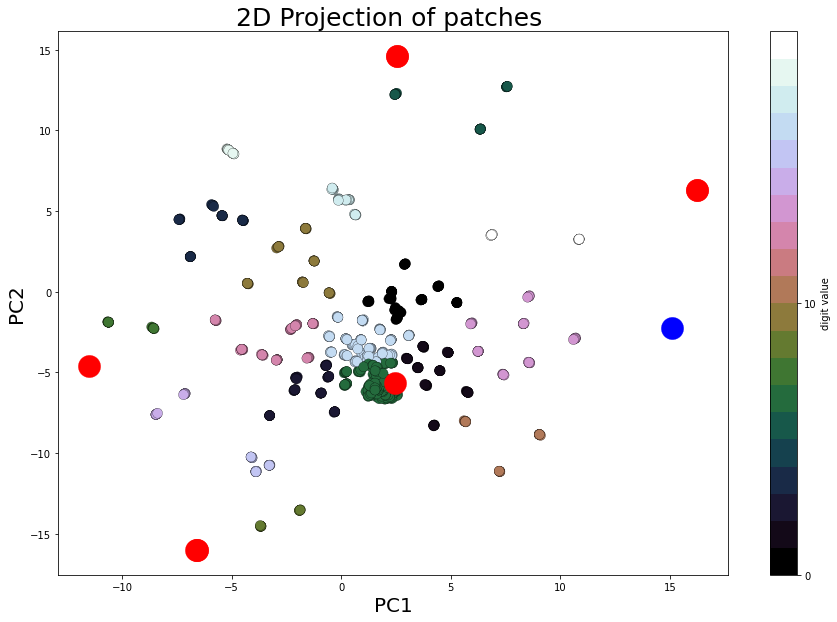

[279.0, 120.0, 236.0, 357.0, 126.0, 3.0, 716.0, 480.0, 596.0, 664.0]

number left  979
most similar img [-5.215615272521973, 8.852068901062012, 18.0, 63.0]


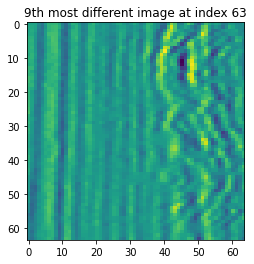

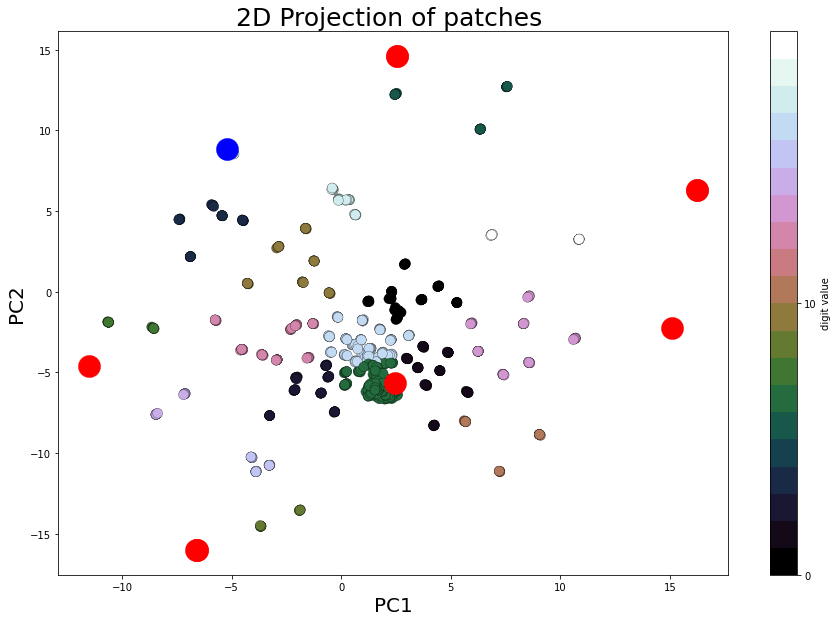

[396.0, 237.0, 119.0, 240.0, 9.0, 120.0, 599.0, 363.0, 479.0, 547.0, 333.0]

number left  953
most similar img [15.05901050567627, -2.2504396438598633, 4.0, 823.0]


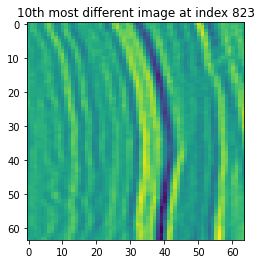

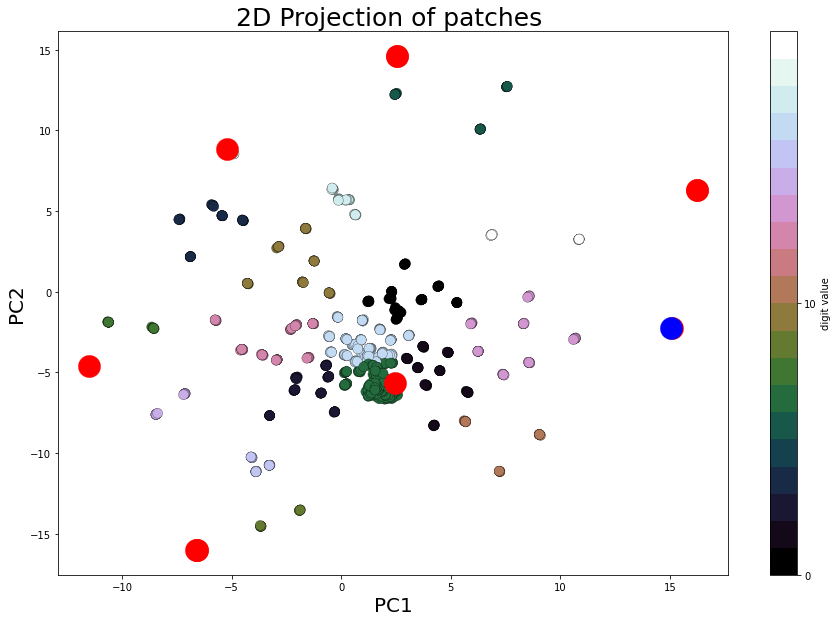

In [12]:
# now we see the indexes of the slices can still be prett close and there is nothing preventing the 10 next slices to be 10* apart.
# Ideally we would find the closest one, remove it from the leist and use it toghet with the previous ref to compute a joint distance
# distance to infer the next slice that is closes to these new points again. 

     
direction = "inline"
treshold = 50
# first we group togheter the pca and the slice index labels

UMAP_cluster_labels = k_means[direction].labels_
UMAP_index_labels =  np.column_stack((UMAP[direction], UMAP_cluster_labels))
UMAP_index_labels =  np.column_stack((UMAP_index_labels, patched_labels[direction])) 

ref = [UMAP_index_labels[0].tolist()]
print("REF", ref)
print("direction", direction)
print("treshold", treshold)

#print(pca[dir][k_means[dir].labels_ == 0, :])
ag = SimilarityImageGenerator(ref, direction, treshold, UMAP_index_labels)
# plot the original ref
plt.imshow(patched_data[direction][int(ref[0][-1])].reshape(patch_size, patch_size).T)
plt.title(f'Referance image at index {ref[0][-1]}')
plt.show()

i = 0 
for img in ag:
    
    # for each iteration, we plot the reference and where on the cluster the next image is taken from 
    print("most similar img", img)
    # plot the next image in the sequence
    next_img = patched_data[direction][int(img[-1])].reshape(patch_size, patch_size).T
    ref_data = np.asarray(ref)
    ref_imgs = 0
    proj= UMAP[direction]
    proj_labels = k_means[direction].labels_ 
    proj_num_samples = n_clusters
    plot_similar_image(i, int(img[-1]), next_img, ref_imgs, ref_data, proj, proj_labels, proj_num_samples)
    
    i= i+1
    if i > 10:
        break
